# Explore the plankton data catalog

## Import libraries

In [1]:
from scivision.io import load_dataset

import matplotlib.pyplot as plt

## Load the catalog

To load an [Intake](https://intake.readthedocs.io/en/latest/index.html) catalog from a repository containing [Scivision](https://github.com/alan-turing-institute/scivision) metadata:

In [2]:
cat = load_dataset('https://github.com/alan-turing-institute/plankton-dsg-challenge')

## Explore the catalog entries

Let's inspect the entries of the catalog. 

In [3]:
list(cat)

['plankton_single',
 'plankton_multiple',
 'labels_raw',
 'labels',
 'labels_holdout']

The catalog contains five data sources: `plankton_single`, `plankton_multiple`, `labels_raw`, `labels` and `labels_holout`. The first two can be used to load the image data, and the last three for the classification labels.  We'll explore each of them in the next sections.

## Fetch the CSV index file

The first entry corresponds to an index file, imported as a `pandas.DataFrame`, which contain the list of all plankton images. Each image include its index, filename, and labels according to three levels of classication: `label1` (zooplankton vs detritus), `label2` (noncopedod vs copedod) and `label3` (species).

In [4]:
labels = cat.labels().read()

In [5]:
type(labels)

pandas.core.frame.DataFrame

In [6]:
labels

,index,filename,label1,label2,label3
0,1,Pia1.2016-10-04.1801+N292_hc.tif,zooplankton,noncopepod,annelida_polychaeta
1,2,Pia1.2016-10-05.1229+N28_hc.tif,zooplankton,noncopepod,annelida_polychaeta
2,3,Pia1.2016-10-06.2118+N136_hc.tif,zooplankton,noncopepod,annelida_polychaeta
3,4,Pia1.2017-03-21.1136+N01644266_hc.tif,zooplankton,noncopepod,annelida_polychaeta
4,5,Pia1.2017-03-21.1136+N01646706_hc.tif,zooplankton,noncopepod,annelida_polychaeta
...,...,...,...,...,...
52923,58787,Pia1.2020-10-18.0359+N01314727_hc.tif,detritus,detritus,detritus
52924,58788,Pia1.2020-10-18.0359+N01314733_hc.tif,detritus,detritus,detritus
52925,58789,Pia1.2020-10-18.0359+N01314746_hc.tif,detritus,detritus,detritus
52926,58790,Pia1.2020-10-18.0359+N01314747_hc.tif,detritus,detritus,detritus


We can explore now the unique labels by level of classification.

In [7]:
for label in ['label1','label2','label3']:
    print(f'Categories in {label}:', labels[label].unique().tolist())
    print('\n')

Categories in label1: ['zooplankton', 'detritus']


Categories in label2: ['noncopepod', 'copepod', 'detritus']


Categories in label3: ['annelida_polychaeta', 'appendicularia', 'bivalvia-larvae', 'byrozoa-larvae', 'chaetognatha', 'cirripedia_barnacle-nauplii', 'cladocera', 'cladocera_evadne-spp', 'cnidaria', 'copepod_unknown', 'copepod_calanoida', 'copepod_calanoida_acartia-spp', 'copepod_calanoida_calanus-spp', 'copepod_calanoida_candacia-spp', 'copepod_calanoida_centropages-spp', 'copepod_calanoida_para-pseudocalanus-spp', 'copepod_calanoida_temora-spp', 'copepod_cyclopoida', 'copepod_cyclopoida_corycaeus-spp', 'copepod_cyclopoida_oithona-spp', 'copepod_cyclopoida_oncaea-spp', 'copepod_harpacticoida', 'copepod_nauplii', 'decapoda-larvae_brachyura', 'echniodermata-larvae', 'euphausiid', 'euphausiid_nauplii', 'fish-eggs', 'gastropoda-larva', 'mysideacea', 'nt-bubbles', 'nt-phyto_ceratium-spp', 'nt-phyto_rhizosolenia-spp', 'nt_phyto_chains', 'ostracoda', 'radiolaria', 'tintinnida', 'tu

Similarly, let's explore the data imbalance by classification level.

In [8]:
for label in ['label1','label2','label3']:
    print(label)
    print(labels[label].value_counts())
    print('\n')

label1
detritus       36000
zooplankton    16928
Name: label1, dtype: int64


label2
detritus      36000
copepod        9316
noncopepod     7612
Name: label2, dtype: int64


label3
detritus                                    36000
copepod_calanoida_para-pseudocalanus-spp     1790
copepod_unknown                              1668
radiolaria                                   1629
copepod_calanoida                            1499
copepod_nauplii                              1242
copepod_cyclopoida_corycaeus-spp             1006
echniodermata-larvae                          720
copepod_calanoida_centropages-spp             696
copepod_cyclopoida_oncaea-spp                 639
copepod_harpacticoida                         579
copepod_cyclopoida_oithona-spp                443
nt-phyto_ceratium-spp                         414
copepod_calanoida_acartia-spp                 406
nt-bubbles                                    319
copepod_calanoida_calanus-spp                 311
appendicularia     

## Fetch a single image entry

The second entry refers to load a single image. We can load any single image of the above table by explicitly passing the filename to `plankton_single`, followed by a call to the `read()` method to load the data. Let's try with the first filename, `Pia1.2016-10-04.1801+N292_hc`.

In [9]:
ds_single = cat.plankton_single(id='Pia1.2016-10-04.1801+N292_hc').read()

/anaconda/envs/scivis-plankton/lib/python3.9/site-packages/xarray/core/dataset.py:2175: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  warnings.warn(


In [10]:
type(ds_single)

xarray.core.dataset.Dataset

Now, let's explore the `ds_single` which imported as a `xarray.Dataset` object. According to [The Pythia Foundations resource](https://foundations.projectpythia.org/core/xarray/xarray.html), `xarray.Dataset` is a dictionary-like container that holds one or more `xarray.DataArray`. The DataArray is one of the basic building blocks of `xarray`. Xarray expands on the capabilities on NumPy arrays, providing a lot of streamlined data manipulation. It is similar in that respect to Pandas, but whereas Pandas excels at working with tabular data, Xarray is focused on N-dimensional arrays of data (i.e. grids). 

In [11]:
print(ds_single)

<xarray.Dataset>
Dimensions:                               (y: 208, x: 208, channel: 3)
Coordinates:
  * y                                     (y) int64 0 1 2 3 ... 204 205 206 207
  * x                                     (x) int64 0 1 2 3 ... 204 205 206 207
  * channel                               (channel) int64 0 1 2
Data variables: (12/23)
    raster                                (y, x, channel) uint8 214 221 ... 219
    EXIF Image ImageWidth                 object 208
    EXIF Image ImageLength                object 208
    EXIF Image BitsPerSample              object [8, 8, 8]
    EXIF Image Compression                object Uncompressed
    EXIF Image PhotometricInterpretation  object 2
    ...                                    ...
    EXIF GPS GPSVersionID                 object [2, 2, 0, 0]
    EXIF GPS GPSLatitudeRef               object !
    EXIF GPS GPSLatitude                  object [0, 0, 0]
    EXIF GPS GPSLongitudeRef              object !
    EXIF GPS GPSLongitu

The following dictionary structure indicate three major keys: 
* `Dimensions`: 
* `Coordinates`:
* `Data variables`:

We can visualise the contained image using `matplotlib` as we usually do with a NumPy array/

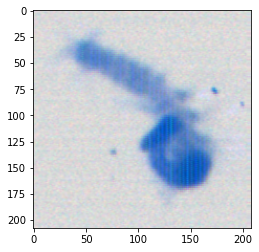

In [12]:
plt.imshow(ds_single['raster'].compute().values)

Great - we have loaded a single image!

## Fetch the complete dataset entry

The final entry refers to load the full dataset. All images are stacked into a single `xarray.Dataset` object with a defined dimension, 1040 px x 832 px.

In [13]:
ds_all = cat.plankton_multiple().to_dask()

In [14]:
print(ds_all)

<xarray.Dataset>
Dimensions:                               (concat_dim: 58752, y: 832, x: 1040, channel: 3)
Coordinates:
  * concat_dim                            (concat_dim) int64 0 1 ... 58750 58751
  * y                                     (y) int64 0 1 2 3 ... 828 829 830 831
  * x                                     (x) int64 0 1 2 3 ... 1037 1038 1039
  * channel                               (channel) int64 0 1 2
    filename                              (concat_dim) <U42 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables: (12/23)
    raster                                (concat_dim, y, x, channel) uint8 dask.array<chunksize=(1, 832, 1040, 3), meta=np.ndarray>
    EXIF Image ImageWidth                 (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF Image ImageLength                (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarray>
    EXIF Image BitsPerSample              (concat_dim) object dask.array<chunksize=(1,), meta=np.ndarr

Let's subset a single image. This can be done using the image index stored in `concat_dim`.

In [15]:
subset = ds_all.sel(concat_dim=0)

In [16]:
print(subset)

<xarray.Dataset>
Dimensions:                               (y: 832, x: 1040, channel: 3)
Coordinates:
    concat_dim                            int64 0
  * y                                     (y) int64 0 1 2 3 ... 828 829 830 831
  * x                                     (x) int64 0 1 2 3 ... 1037 1038 1039
  * channel                               (channel) int64 0 1 2
    filename                              <U42 dask.array<chunksize=(), meta=np.ndarray>
Data variables: (12/23)
    raster                                (y, x, channel) uint8 dask.array<chunksize=(832, 1040, 3), meta=np.ndarray>
    EXIF Image ImageWidth                 object dask.array<chunksize=(), meta=np.ndarray>
    EXIF Image ImageLength                object dask.array<chunksize=(), meta=np.ndarray>
    EXIF Image BitsPerSample              object dask.array<chunksize=(), meta=np.ndarray>
    EXIF Image Compression                object dask.array<chunksize=(), meta=np.ndarray>
    EXIF Image PhotometricInte

Text(0.5, 1.0, 'Pia1.2016-08-02.1631+N38_hc._fy.tif')

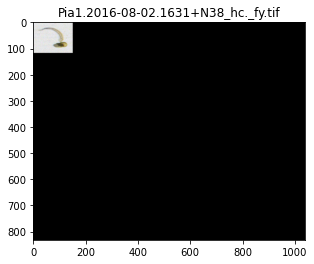

In [17]:
subset = ds_all.sel(concat_dim=2)
plt.imshow(subset['raster'].compute().values[:,:,:])
plt.title(subset.filename.compute().values)